# Datos Espaciales

## Tablas geográficas

**¿Qué son las tablas geográficas?**
- Son estructuras de datos tipo tabla (filas y columnas) donde **una columna contiene geometría**.
- Cada fila representa un **objeto geográfico** (por ejemplo, un país, cantón o punto).
- Las columnas contienen **atributos** o características de ese objeto.


*¿Qué significa "una columna contiene geometría"?*

- En una tabla geográfica, hay una columna especial llamada `geometry`, que **almacena la forma y ubicación** del objeto en el espacio.
- Esta columna **no contiene texto ni números tradicionales**, sino **objetos geométricos** definidos según el estándar del **Open Geospatial Consortium (OGC)** conocido como *Simple Features*.

- Tipos comunes de geometrías:
  - `Point` → representa una coordenada (latitud/longitud o X/Y).
  - `LineString` → una línea definida por múltiples puntos (por ejemplo, una carretera).
  - `Polygon` → una superficie cerrada (por ejemplo, el contorno de un país).
  - `MultiPoint`, `MultiLineString`, `MultiPolygon` → versiones compuestas de los anteriores.

- Ejemplo de cómo se ve una geometría tipo polígono:



```text
POLYGON ((-79.2 -2.1, -78.5 -2.1, -78.5 -1.5, -79.2 -1.5, -79.2 -2.1))


**Terminología estandarizada**
- En este enfoque:
  - **Feature** = columna (variable o atributo)
  - **Sample** = fila (observación completa)
- Aunque en GIS “feature” puede significar entidad espacial, aquí se sigue la lógica de ciencia de datos.






**Ejemplo práctico: `GeoDataFrame` en `geopandas`**

In [10]:
import geopandas as gpd

# Leer archivo GeoPackage
uu = "https://github.com/vmoprojs/DataLectures/raw/refs/heads/master/SpatialData/countries_clean.gpkg"
gt_polygons = gpd.read_file(uu)

Veamos algunos datos de la tabla con `.head()`

In [12]:
gt_polygons.head()

ADMIN                                           geometry
0  Indonesia  MULTIPOLYGON (((1.31e+07 4.64e+05, 1.31e+07 4....
1   Malaysia  MULTIPOLYGON (((1.31e+07 4.64e+05, 1.31e+07 4....
2      Chile  MULTIPOLYGON (((-7.74e+06 -1.98e+06, -7.74e+06...
3    Bolivia  POLYGON ((-7.74e+06 -1.98e+06, -7.74e+06 -1.98...
4       Peru  MULTIPOLYGON (((-7.74e+06 -1.98e+06, -7.75e+06...

Cada fila de esta tabla representa un **país**. Para cada país se registran únicamente dos características: el **nombre administrativo** y la **geometría de su límite territorial**. El nombre del país se almacena en la columna **`ADMIN`** y está codificado como un texto utilizando el tipo **`str`** de Python. La geometría del límite se encuentra en la columna **`geometry`**, y está representada mediante una **clase especializada de Python** diseñada para manipular **objetos geométricos**.

Al igual que en otras **estructuras de datos tabulares** en Python, tanto las **filas** como las **columnas** están **indexadas**; este índice actúa como **identificador único** y aparece resaltado en negrita en el margen izquierdo de la tabla. Esta tabla geográfica corresponde a un objeto del tipo **`geopandas.GeoDataFrame`**, ampliamente utilizado en el ecosistema Python para **representar y analizar datos espaciales**.

Las **tablas geográficas** almacenan **información espacial** incorporándola como una **columna adicional**. Pero, ¿cómo se representa internamente esta información? Para comprenderlo mejor, podemos **examinar el tipo de objeto contenido en la primera fila** de la columna correspondiente.


In [16]:
type(gt_polygons.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

En **`geopandas`**, así como en otros paquetes dedicados a representar datos geográficos, la columna **`geometry`** posee **características especiales** que no se encuentran en columnas "normales", como **`ADMIN`**. 

Por ejemplo, cuando se genera una visualización del DataFrame, **la columna `geometry` se utiliza automáticamente como la base para representar las formas geográficas**, tal como se ilustra en la figura siguiente.


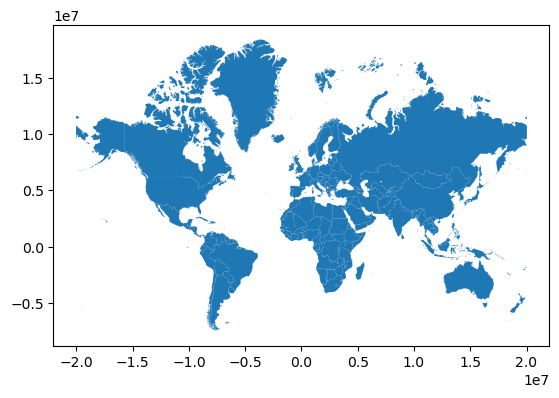

In [22]:
gt_polygons.plot();

Modificar la **representación geométrica** de una muestra debe realizarse con precaución. Dado que la columna **`geometry`** tiene un comportamiento especial, existen funciones específicas para ajustar su contenido. 

Por ejemplo, si se desea representar cada país mediante su **centroide** —un punto que se ubica en el centro de la forma—, es fundamental asegurarse de que la nueva columna geométrica se establezca correctamente utilizando el método **`set_geometry()`**. Esto resulta especialmente útil cuando se desea trabajar con **dos representaciones geométricas distintas** de una misma muestra.

A continuación, construiremos un mapa que muestre tanto el **límite** como el **centroide** de un país. Para calcular el centroide, se puede utilizar la propiedad **`gt_polygons.geometry.centroid`**, la cual devuelve el punto que **minimiza la distancia promedio** desde todos los demás puntos del contorno de la figura. El resultado puede almacenarse en una nueva columna, por ejemplo, denominada **`centroid`**.


In [25]:
gt_polygons["centroid"] = gt_polygons.geometry.centroid

Ahora tenemos un campo adicional

In [28]:
gt_polygons.head()

ADMIN                                           geometry  \
0  Indonesia  MULTIPOLYGON (((1.31e+07 4.64e+05, 1.31e+07 4....   
1   Malaysia  MULTIPOLYGON (((1.31e+07 4.64e+05, 1.31e+07 4....   
2      Chile  MULTIPOLYGON (((-7.74e+06 -1.98e+06, -7.74e+06...   
3    Bolivia  POLYGON ((-7.74e+06 -1.98e+06, -7.74e+06 -1.98...   
4       Peru  MULTIPOLYGON (((-7.74e+06 -1.98e+06, -7.75e+06...   

                      centroid  
0   POINT (1.31e+07 -2.49e+05)  
1    POINT (1.22e+07 4.23e+05)  
2  POINT (-7.96e+06 -4.92e+06)  
3   POINT (-7.2e+06 -1.89e+06)  
4  POINT (-8.28e+06 -1.03e+06)

Aunque la columna **`centroid`** contiene datos geométricos —lo cual se puede reconocer porque cada celda comienza con **`POINT`**—, **no está definida como la geometría activa** de la tabla. 

Para cambiar esto, se puede utilizar el método **`set_geometry()`**, que permite asignar una nueva columna geométrica activa dentro del objeto `GeoDataFrame`.

Una vez realizada esta modificación, es posible **visualizar simultáneamente los centroides y los límites de cada país** al utilizar el nuevo valor de geometría establecido mediante **`set_geometry()`**.


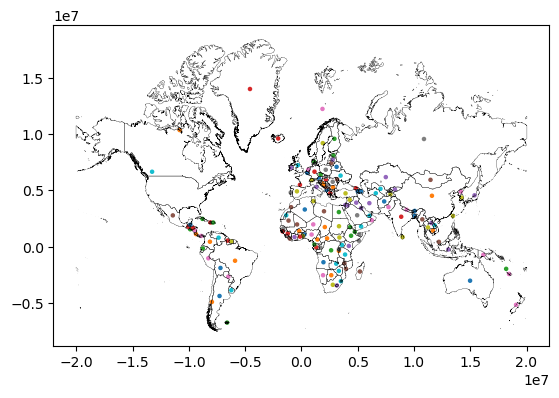

In [31]:
# Plot centroids
ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=5)
# Plot polygons without color filling
gt_polygons.plot(
    "ADMIN", ax=ax, facecolor="none", edgecolor="k", linewidth=0.2
);

Una vez más, es importante notar que podemos **generar un mapa directamente** al aplicar el método **`.plot()`** sobre un objeto `GeoDataFrame`. Además, es posible **asignar colores temáticos** a cada entidad geográfica en función de los valores de una columna específica —por ejemplo, utilizando la columna **`ADMIN`**—. En todos los casos, se utiliza la **geometría activa** para la visualización.

Como debe quedar claro hasta este punto, **casi cualquier objeto geográfico** puede ser representado mediante una o más **columnas geométricas**. Si consideramos la variedad de formas posibles, el panorama puede parecer complejo. Afortunadamente, el **Open Geospatial Consortium (OGC)** ha definido un conjunto de **tipos geométricos abstractos**, formalizados en la especificación **ISO 19125-1**, también conocida como la especificación de **"simple features"**.

Esta norma establece relaciones formales entre los distintos tipos geométricos:

- **`Point`**: ubicación puntual en dos dimensiones (x, y).
- **`LineString`**: camino formado por una secuencia de puntos conectados.
- **`Polygon`**: superficie cerrada delimitada por al menos un `LineString`.

También existen variantes como **`MultiPoint`**, **`MultiLineString`** o **`MultiPolygon`**, que permiten representar **conjuntos de geometrías del mismo tipo**. Por ejemplo, **Bolivia** puede representarse como un único **polígono** en la columna de geometr


In [34]:
gt_polygons.query('ADMIN == "Bolivia"')

ADMIN                                           geometry  \
3  Bolivia  POLYGON ((-7.74e+06 -1.98e+06, -7.74e+06 -1.98...   

                     centroid  
3  POINT (-7.2e+06 -1.89e+06)

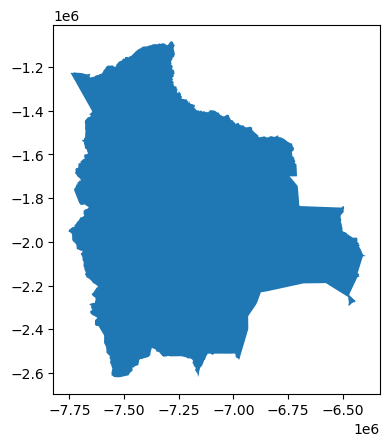

In [36]:
gt_polygons.query('ADMIN == "Bolivia"').plot();

Mientras que Indonesia es un `MultiPolygon` que contiene muchos `Polygons` para cada isla individual del país:

In [39]:
gt_polygons.query('ADMIN == "Indonesia"')

ADMIN                                           geometry  \
0  Indonesia  MULTIPOLYGON (((1.31e+07 4.64e+05, 1.31e+07 4....   

                     centroid  
0  POINT (1.31e+07 -2.49e+05)

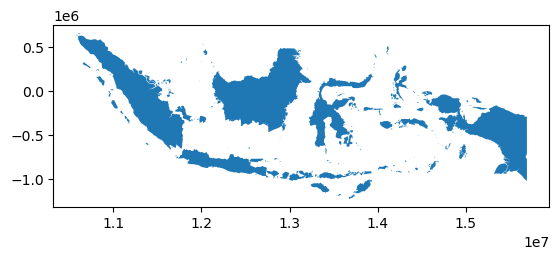

In [41]:
gt_polygons.query('ADMIN == "Indonesia"').plot();

En muchos casos, las **tablas geográficas** contienen **geometrías de un único tipo**; por ejemplo, todos los registros pueden ser del tipo **`Point`** o **`LineString`**. Sin embargo, **no existe un requisito formal** que obligue a que todas las geometrías de una tabla sean del mismo tipo.

A lo largo de este documento utilizaremos ampliamente las **tablas geográficas**, almacenando principalmente **polígonos**, pero también **puntos** y **líneas**. Exploraremos las líneas con más detalle en la segunda parte del capítulo, pero por ahora nos detendremos brevemente en los puntos.

Como se mencionó anteriormente, los **puntos** son el tipo de entidad más simple, ya que **no poseen dimensión**, sino únicamente un **par de coordenadas**. Por esta razón, en algunos casos, los puntos pueden almacenarse incluso en una **tabla no geográfica**, utilizando simplemente una columna para cada coordenada.

Un ejemplo de esto se encuentra en el conjunto de datos de **Tokio**, que utilizaremos más adelante. En este caso, los datos están almacenados en un archivo de texto separado por comas, es decir, un archivo **`.csv`**.


In [48]:
import pandas as pd
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/refs/heads/master/SpatialData/tokyo_clean.csv"
gt_points = pd.read_csv(uu)

Como lo hemos leído con `pandas`, la tabla se carga como un `DataFrame`, sin ninguna dimensión espacial explícita:

In [51]:
type(gt_points)

pandas.core.frame.DataFrame

Si inspeccionamos la tabla, encontramos que no hay una columna de `geometry`:

In [54]:
gt_points.head()

user_id   longitude   latitude             date_taken  \
0     10727420@N00  139.700499  35.674000  2010-04-09 17:26:25.0   
1      8819274@N04  139.766521  35.709095  2007-02-10 16:08:40.0   
2     62068690@N00  139.765632  35.694482  2008-12-21 15:45:31.0   
3  49503094041@N01  139.784391  35.548589  2011-11-11 05:48:54.0   
4     40443199@N00  139.768753  35.671521  2006-04-06 16:42:49.0   

                                photo/video_page_url             x  \
0  http://www.flickr.com/photos/10727420@N00/4545...  1.555139e+07   
1  http://www.flickr.com/photos/8819274@N04/26503...  1.555874e+07   
2  http://www.flickr.com/photos/62068690@N00/3125...  1.555864e+07   
3  http://www.flickr.com/photos/49503094041@N01/6...  1.556073e+07   
4  http://www.flickr.com/photos/40443199@N00/2482...  1.555899e+07   

              y  
0  4.255856e+06  
1  4.260667e+06  
2  4.258664e+06  
3  4.238684e+06  
4  4.255517e+06

Muchos conjuntos de datos basados en **puntos** se distribuyen en formato **CSV**, es decir, como tablas con columnas que contienen coordenadas. Para poder aprovechar al máximo este tipo de datos, es recomendable **convertirlos en tablas `GeoDataFrame`**.

Este proceso implica dos pasos principales:

1. **Transformar las coordenadas crudas en objetos geométricos**, convirtiendo los valores de latitud y longitud en puntos espaciales reconocidos por `GeoPandas`.


In [59]:
import geopandas as gpd
pt_geoms = gpd.points_from_xy(
    x=gt_points["longitude"],
    y=gt_points["latitude"],
    # x,y are Earth longitude & latitude
    crs="EPSG:4326",
)

2. A continuación, se crea un **objeto `GeoDataFrame`** utilizando las geometrías generadas en el paso anterior. Este objeto combina la **estructura tabular** de un `DataFrame` tradicional con una columna especial que almac


In [64]:
gt_points = gpd.GeoDataFrame(gt_points, geometry=pt_geoms)

Ahora, el objeto **`gt_points`** se comporta de manera muy similar al que utilizamos anteriormente para representar países. La diferencia principal es que, en este caso, la **columna `geometry` almacena geometrías de tipo `POINT`**, en lugar de polígonos. Esto permite aplicar las mismas herramientas de análisis y visualización geográfica, pero sobre datos puntuales.


In [67]:
gt_points.head()

user_id   longitude   latitude             date_taken  \
0     10727420@N00  139.700499  35.674000  2010-04-09 17:26:25.0   
1      8819274@N04  139.766521  35.709095  2007-02-10 16:08:40.0   
2     62068690@N00  139.765632  35.694482  2008-12-21 15:45:31.0   
3  49503094041@N01  139.784391  35.548589  2011-11-11 05:48:54.0   
4     40443199@N00  139.768753  35.671521  2006-04-06 16:42:49.0   

                                photo/video_page_url             x  \
0  http://www.flickr.com/photos/10727420@N00/4545...  1.555139e+07   
1  http://www.flickr.com/photos/8819274@N04/26503...  1.555874e+07   
2  http://www.flickr.com/photos/62068690@N00/3125...  1.555864e+07   
3  http://www.flickr.com/photos/49503094041@N01/6...  1.556073e+07   
4  http://www.flickr.com/photos/40443199@N00/2482...  1.555899e+07   

              y               geometry  
0  4.255856e+06   POINT (139.7 35.674)  
1  4.260667e+06  POINT (139.77 35.709)  
2  4.258664e+06  POINT (139.77 35.694)  
3  4.238684e+06  POINT (139.78 35.549)  
4  4.255517e+06  POINT (139.77 35.672)

## Superficies

Las **superficies** se utilizan para representar datos según el **modelo de campo espacial**. En teoría, un campo es una superficie continua, lo que implica que podría medirse en un **número infinito de ubicaciones**. Sin embargo, en la práctica, los campos se miden en un **conjunto finito de puntos de muestreo**, distribuidos de forma **uniforme en el espacio** para mantener la continuidad del modelo.

Estas superficies se representan mediante **rejillas o cuadrículas**, donde **cada celda contiene una observación**. Una cuadrícula puede entenderse también como una **tabla con filas y columnas**, pero —a diferencia de las tablas geográficas convencionales— **cada fila y columna está asociada directamente a una ubicación geográfica**, no a una columna específica con geometría.

Para ilustrar cómo Python maneja estas superficies, utilizaremos un extracto de un conjunto de datos globales de población para la ciudad brasileña de **São Paulo**. Este conjunto registra el número de habitantes en **celdas de tamaño uniforme** que cubren toda la superficie terrestre. El extracto se encuentra en formato **GeoTIFF**, una variante del formato TIF que incluye información geográfica embebida.

Podemos leer este archivo utilizando el método **`open_rasterio()`** del paquete **`rioxarray`**, que permite cargar y manipular datos espaciales en formato ráster de forma eficiente.


In [77]:
import rioxarray as rxr
uu = "https://github.com/vmoprojs/DataLectures/raw/refs/heads/master/SpatialData/ghsl_sao_paulo.tif"
pop = rxr.open_rasterio(uu)

Este procedimiento carga los datos en un objeto del tipo **`DataArray`**, que es una estructura proporcionada por la librería `xarray` para trabajar con **datos multidimensionales**, comúnmente utilizada en análisis espaciales y climáticos.


In [80]:
type(pop)

xarray.core.dataarray.DataArray

`xarray` es una biblioteca diseñada para trabajar con **arreglos multidimensionales etiquetados**. ¿Qué significa esto? A diferencia de las tablas tradicionales que tienen solo **dos dimensiones** (filas y columnas), `xarray` permite manejar estructuras con **un número arbitrario de dimensiones**, lo que resulta ideal para representar fenómenos complejos en el espacio y el tiempo.

Cada dimensión está asociada a un **índice o coordenada**, lo que permite **acceder, filtrar y operar los datos de forma eficiente y estructurada**. En el caso de los objetos `DataArray`, estas **coordenadas** se almacenan en el atributo **`.coords`**, desde el cual pueden consultarse directamente.


In [83]:
pop.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 0

De manera interesante, nuestra superficie cuenta con **tres dimensiones**: **`x`**, **`y`** y **`band`**. Las dos primeras representan la **latitud y longitud** que abarca cada celda de la cuadrícula poblacional. La tercera, **`band`**, contiene un único valor (1), por lo que en este caso **no aporta información relevante**.

Sin embargo, es fácil imaginar **contextos donde una tercera dimensión sí resulta útil**. Por ejemplo, una imagen óptica a color puede tener **tres bandas**: **rojo**, **verde** y **azul**. Sensores más avanzados pueden capturar bandas adicionales, como el **infrarrojo cercano (NIR)** o incluso bandas de radio.

Asimismo, si una superficie se mide a lo largo del tiempo —como los **geocubos** mencionados en el Capítulo 2—, cada **banda** podría representar un **instante temporal** distinto en el que se registró el campo. En resumen, una **superficie geográfica** suele tener **dos dimensiones espaciales (`x` e `y`)** para ubicar las celdas, y **al menos una dimensión adicional (`band`)** para registrar otras características del fenómeno observado.

Un objeto de tipo **`xarray.DataArray`** contiene información adicional sobre los datos que almacena en el atributo **`.attrs`**. Este atributo funciona como un **diccionario de metadatos**, donde se pueden encontrar detalles relevantes sobre el origen, la unidad de medida, la resolución espacial, el sistema de coordenadas, entre otros aspectos que describen el contenido del arreglo.


In [87]:
pop.attrs

{'AREA_OR_POINT': 'Area',
 '_FillValue': -200.0,
 'scale_factor': 1.0,
 'add_offset': 0.0}

En este caso, el atributo **`.attrs`** incluye información clave para convertir los **píxeles del arreglo** en **ubicaciones geográficas reales** sobre la superficie terrestre. Entre estos metadatos se encuentran, por ejemplo, el **sistema de referencia espacial (`crs`)** y el **parámetro de transformación (`transform`)**.

Además, se especifica la **resolución espacial**, que en este conjunto de datos es de **250 metros por 250 metros**. Esta información, junto con otros metadatos adicionales, nos permite **comprender mejor el origen de los datos, su estructura y cómo deben interpretarse en un contexto geográfico**.

Por lo tanto, nuestro objeto **`DataArray`** posee **tres dimensiones**:



In [90]:
pop.shape

(1, 416, 468)

Una operación común consiste en **reducir el objeto `DataArray` a solo las dos dimensiones geográficas** (`x` e `y`). Para ello, se puede utilizar el operador **`.sel`**, que permite **seleccionar datos según el valor de sus coordenadas**.

Este método resulta útil cuando se desea trabajar únicamente con una banda específica u observar una porción del arreglo espacial en función de sus coordenadas.


In [93]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

El objeto resultante es, por tanto, un **arreglo bidimensional**. Al igual que ocurre con las **tablas geográficas**, podemos **visualizar rápidamente los valores** del conjunto de datos mediante un gráfico, lo que facilita la exploración visual del fenómeno representado en el espacio.


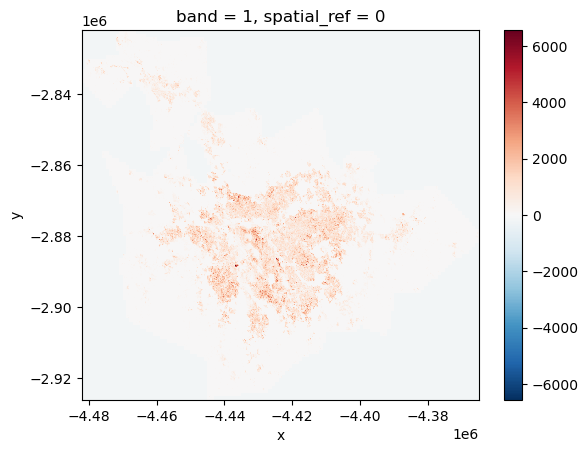

In [95]:
pop.sel(band=1).plot();

Esta visualización nos ofrece una **primera aproximación a la distribución poblacional** en la región de **São Paulo**. Sin embargo, al inspeccionar el mapa con mayor detalle, observamos que aparecen **valores negativos en el conteo de población**, lo cual resulta sorprendente.

¿Por qué ocurre esto? En muchos conjuntos de datos espaciales, los **valores perdidos no se representan como `NaN`**, sino mediante **valores imposibles**, como una **constante negativa**. Tal como se muestra en el atributo **`nodatavals`** del objeto, los **datos faltantes se codifican con el valor `-200`**.

Teniendo esto en cuenta, podemos utilizar el método **`.where()`** para **filtrar únicamente los valores válidos**, es decir, aquellos distintos de `-200`, y así evitar que los datos faltantes distorsionen el análisis.


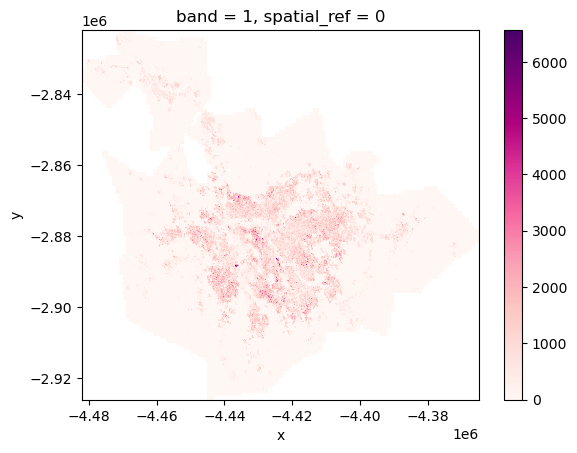

In [98]:
pop.where(pop != -200).sel(band=1).plot(cmap="RdPu");

Ahora, la **barra de colores** tiene un aspecto mucho más coherente, ya que **refleja únicamente los valores reales de población**, sin incluir los valores reservados para datos faltantes. Esto permite una **interpretación más precisa y clara del mapa**, centrada únicamente en la información válida.


## Grafos espaciales

Los **grafos espaciales** almacenan las **conexiones entre objetos a través del espacio**. Estas conexiones pueden derivarse de la **topología geográfica** (como la contigüidad), de la **distancia**, o de dimensiones más complejas como los **flujos de interacción** (por ejemplo, desplazamientos, comercio o comunicaciones).

A diferencia de las **tablas geográficas** o las **superficies espaciales**, los grafos tienen una naturaleza distinta. En primer lugar, **no registran directamente fenómenos medidos**, sino que se centran en **las relaciones** entre objetos, facilitadas o limitadas por la distancia o el espacio. En segundo lugar, por su carácter relacional, los datos en los grafos **no siguen una estructura rígida**: mientras una entidad puede estar conectada a una sola, otra puede tener múltiples conexiones. Esto contrasta fuertemente con las estructuras de datos espaciales tradicionales, que son **estructuradas y multidimensionales**.

Estas características requieren un **conjunto distinto de estructuras de datos en Python**. A diferencia de las anteriores, existen **varios formatos para representar grafos espaciales**, cada uno optimizado para distintos fines. Uno de los casos más comunes es el uso de **matrices de pesos espaciales** en métodos estadísticos como el análisis exploratorio o la regresión, tema que se abordará en el siguiente capítulo.

En este capítulo, revisaremos brevemente otra forma de representar grafos espaciales, más cercana al **concepto matemático de grafo**. Un grafo está compuesto por **nodos** conectados entre sí mediante **aristas**. En un grafo espacial, los nodos pueden representar **lugares geográficos con una ubicación definida**, y las aristas pueden representar **rutas o trayectorias entre ellos**. Para poder analizar una red, es necesario contar con información sobre **ambos elementos: nodos y aristas**.

Como ejemplo, utilizaremos la biblioteca **`osmnx`**, que permite consultar datos de **OpenStreetMap**. A modo ilustrativo, extraeremos el **grafo de calles del parque Yoyogi**, ubicado cerca del área de Tokio usada en ejemplos anteriores.


In [107]:
import osmnx as ox
graph = ox.graph_from_place("Yoyogi Park, Shibuya, Tokyo, Japan")

El fragmento de código anterior **envía una consulta al servidor de OpenStreetMap para obtener los datos del grafo**. Es importante tener en cuenta que esta operación **requiere conexión a internet** para funcionar correctamente.

Una vez que los datos son recuperados por **`osmnx`**, se **procesan automáticamente y se convierten en una representación de grafo en Python**. Esta estructura permite trabajar directamente con nodos y aristas, lo que facilita el análisis y visualización de redes espaciales utilizando herramientas del ecosistema `networkx`.


In [114]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Podemos realizar una **inspección rápida de la estructura del grafo** utilizando el método **`plot_graph()`**. Esta función genera una visualización básica del grafo, mostrando los **nodos** y las **conexiones (aristas)** entre ellos, lo que permite obtener una **vista general de la red espacial**.


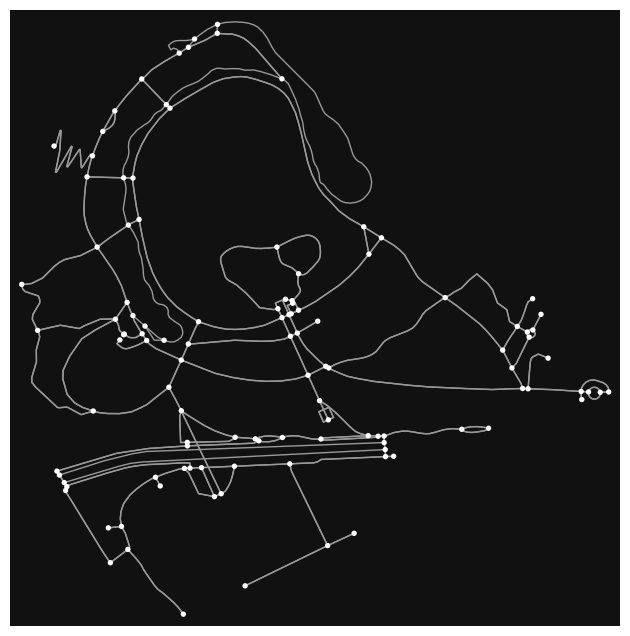

In [119]:
ox.plot_graph(graph);

El grafo resultante es en realidad un objeto del tipo **`MultiDiGraph`** de la biblioteca **`networkx`**, especializada en el análisis de grafos en Python. En este caso, el grafo representa una **colección de 113 nodos**, que corresponden a **intersecciones de calles** dentro del área seleccionada.

Este tipo de estructura permite representar **múltiples conexiones dirigidas entre pares de nodos**, lo que resulta útil para modelar redes viales, donde pueden existir **varios caminos posibles entre dos ubicaciones**, como calles de doble sentido o carriles separados.


In [122]:
len(graph.nodes)

113

Además, el grafo contiene **305 aristas**, que representan las **calles que conectan las intersecciones** (nodos). Cada arista puede incluir información adicional como la longitud del tramo, el tipo de vía, o la velocidad permitida, lo que permite realizar análisis más detallados sobre la **estructura y funcionalidad de la red vial**.


In [126]:
len(graph.edges)

305

Cada uno de estos elementos puede ser **consultado individualmente para obtener información adicional**, como la **ubicación geográfica** y el **identificador (ID)** de un nodo. Esta capacidad de acceder a los atributos de nodos y aristas permite realizar análisis espaciales detallados y personalizar la representación de la red según distintas variables de interés.


In [132]:
graph.nodes[1520546819]

{'y': 35.6711267, 'x': 139.6925951, 'street_count': 4}

También es posible consultar las **características de una arista**, como su **longitud**, el **tipo de vía**, la **velocidad permitida**, el **número de carriles**, entre otros atributos. Esta información resulta clave para realizar análisis de accesibilidad, optimización de rutas o simulaciones de movilidad dentro de una red vial.


In [135]:
graph.edges[(1520546819, 3010293622, 0)]

{'osmid': 138670840,
 'highway': 'footway',
 'oneway': False,
 'reversed': False,
 'length': 59.113074370021955,
 'geometry': <LINESTRING (140 35.7, 140 35.7, 140 35.7)>}

También podemos explorar **cómo se relacionan entre sí los distintos componentes del grafo**. Por ejemplo, es posible consultar **qué otros nodos están conectados directamente con un nodo específico**, como el nodo **`1520546819`**. Esta funcionalidad permite analizar la **estructura local de la red**, identificar puntos críticos de conexión o estudiar patrones de conectividad dentro del sistema vial.


In [137]:
list(graph.adj[1520546819].keys())

[3010293622, 5764960322, 1913626649, 1520546959]

En resumen, las **redes espaciales** son relativamente **fáciles de representar en Python** gracias a bibliotecas como `networkx` y `osmnx`. Además, constituyen **una de las tres estructuras de datos fundamentales** en la ciencia de datos geoespaciales, junto con las **tablas geográficas** y las **superficies espaciales**. Cada una de estas estructuras permite abordar diferentes tipos de preguntas y fenómenos en el análisis territorial.
